本课程中收获的问题列表

想了解每个物理值的可用性。例如之前讨论过的的bulge和disk的segment，其中的界定是人为定义（某个等光度半径？）；类似于半光半径和盘的比例、sersic指数，这些虽然也是人为定义的，但确是有明确的物理定义；我想描述的是物理量定义的认可度或者可用性，感觉这是我在听讲课的时候也想了解的部分。

某个星系（或问题）的综合论述

In [1]:
!curl -o "hst_10592_55_acs_wfc_f814w_sci.fits" "https://hla.stsci.edu/cgi-bin/fitscut.cgi?red=hst_10592_55_acs_wfc_f814w&size=ALL&format=fits&config=ops" 

  % Total    % Received % Xferd  Average Speed   Time    Time     Time  Current
                                 Dload  Upload   Total   Spent    Left  Speed
100 71.1M    0 71.1M    0     0  6579k      0 --:--:--  0:00:11 --:--:-- 10.0M


In [2]:
import os
import numpy as np
import pandas as pd
from astropy.wcs import WCS
from astropy.io import fits
from tqdm import tqdm
import sys
import warnings
import matplotlib.pyplot as plt
from PIL import Image
hdul = fits.open('hst_10592_55_acs_wfc_f814w_sci.fits')
data = hdul[1].data

In [5]:
from astropy.visualization import simple_norm
from astropy.modeling.models import Sersic2D
from astropy.convolution import convolve, Gaussian2DKernel
from photutils.segmentation import detect_threshold, detect_sources
import statmorph
from statmorph.utils.image_diagnostics import make_figure
%matplotlib inline

In [3]:
print(data.shape)

(4383, 4253)


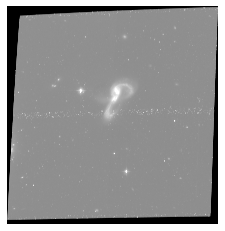

In [6]:
# 显示原始图像
norm = simple_norm(data, stretch='log', percent=99.9)
plt.imshow(data, cmap='gray', origin='lower', norm=norm)
plt.axis('off')
plt.box(False)

/tmp/ipykernel_763983/2107623590.py:1: DeprecationWarning: `photutils.detect_sources` is a deprecated alias for `photutils.segmentation.detect_sources` and will be removed in the future. Instead, please use `from photutils.segmentation import detect_sources` to silence this warning.
  from photutils import detect_sources


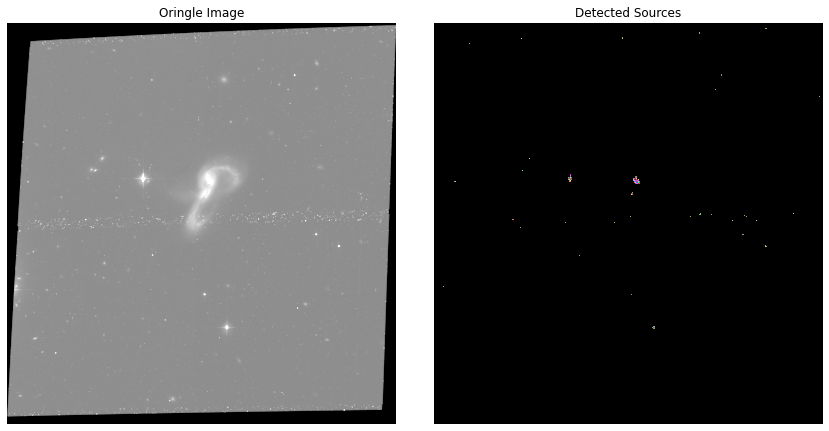

In [7]:
from photutils import detect_sources
from astropy.io import fits

# 检测天体
threshold = 2.5  # 检测阈值
segm = detect_sources(data, threshold, npixels=5)
# 检查是否检测到天体
if segm is None:
    print("未检测到任何天体！请检查阈值或图像数据。")
else:
    # 可视化结果
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

    # 显示原始图像
    norm = simple_norm(data, stretch='log', percent=99.9)
    ax1.imshow(data, cmap='gray', origin='lower', norm=norm)
    ax1.axis('off')
    ax1.set_title('Oringle Image')

    # 显示检测到的天体
    ax2.imshow(segm.data, cmap=segm.cmap, origin='lower')
    ax2.axis('off')
    ax2.set_title('Detected Sources')

    plt.tight_layout()
    plt.show()

/tmp/ipykernel_763983/1395572628.py:1: DeprecationWarning: `photutils.detect_sources` is a deprecated alias for `photutils.segmentation.detect_sources` and will be removed in the future. Instead, please use `from photutils.segmentation import detect_sources` to silence this warning.
  from photutils import detect_sources, SourceCatalog
/tmp/ipykernel_763983/1395572628.py:1: DeprecationWarning: `photutils.SourceCatalog` is a deprecated alias for `photutils.segmentation.SourceCatalog` and will be removed in the future. Instead, please use `from photutils.segmentation import SourceCatalog` to silence this warning.
  from photutils import detect_sources, SourceCatalog


源 1: x = 568.20, y = 103.64
源 2: x = 981.61, y = 111.77
源 3: x = 80.79, y = 112.72
源 4: x = 2629.18, y = 139.50
源 5: x = 2880.74, y = 164.62
源 6: x = 3928.79, y = 174.96
源 7: x = 2410.90, y = 184.44
源 8: x = 4001.16, y = 189.77
源 9: x = 1778.78, y = 255.05
源 10: x = 532.14, y = 777.40
源 11: x = 390.47, y = 788.03
源 12: x = 307.09, y = 934.81
源 13: x = 2403.15, y = 1055.90
源 14: x = 1730.65, y = 1137.18
源 15: x = 3176.56, y = 1267.02
源 16: x = 2159.65, y = 1416.70
源 17: x = 102.34, y = 1507.74
源 18: x = 131.04, y = 1590.27
源 19: x = 1591.30, y = 1845.97
源 20: x = 3628.24, y = 1944.15
源 21: x = 3381.00, y = 2073.07
源 22: x = 139.65, y = 2110.12
源 23: x = 941.56, y = 2148.13
源 24: x = 918.44, y = 2159.93
源 25: x = 636.86, y = 2182.23
源 26: x = 1153.86, y = 2188.37
源 27: x = 1436.61, y = 2200.94
源 28: x = 1972.72, y = 2202.44
源 29: x = 793.70, y = 2209.44
源 30: x = 1554.05, y = 2215.44
源 31: x = 314.89, y = 2221.37
源 32: x = 3263.87, y = 2222.21
源 33: x = 3594.59, y = 2225.75
源 34: x = 352

/tmp/ipykernel_763983/1395572628.py:27: UserWarning: Glyph 26816 (\N{CJK UNIFIED IDEOGRAPH-68C0}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_763983/1395572628.py:27: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/tmp/ipykernel_763983/1395572628.py:27: UserWarning: Glyph 28304 (\N{CJK UNIFIED IDEOGRAPH-6E90}) missing from font(s) DejaVu Sans.
  plt.tight_layout()
/data/public/xqf/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 26816 (\N{CJK UNIFIED IDEOGRAPH-68C0}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/data/public/xqf/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 27979 (\N{CJK UNIFIED IDEOGRAPH-6D4B}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/data/public/xqf/anaconda3/lib/python3.9/site-packages/IPython/core/pylabtools.py:151: UserWarning:

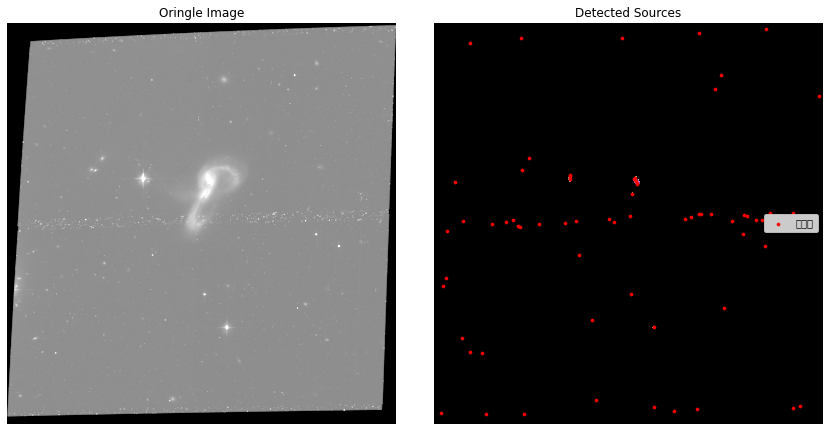

In [9]:
from photutils import detect_sources, SourceCatalog
# 使用 SourceCatalog 提取源属性
cat = SourceCatalog(data, segm)

# 提取每个源的中心坐标 (xcentroid, ycentroid)
positions = np.transpose((cat.xcentroid, cat.ycentroid))

# 打印每个源的位置
for i, (x, y) in enumerate(positions):
    print(f"源 {i + 1}: x = {x:.2f}, y = {y:.2f}")

# 可视化结果
fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(12, 6))

# 显示原始图像
norm = simple_norm(data, stretch='log', percent=99.9)
ax1.imshow(data, cmap='gray', origin='lower', norm=norm)
ax1.axis('off')
ax1.set_title('Oringle Image')
# 显示检测到的天体位置
ax2.imshow(segm.data, cmap=segm.cmap, origin='lower')
ax2.scatter(cat.xcentroid, cat.ycentroid, color='red', marker='o', s=10, lw=0.5, label='检测源')
ax2.axis('off')
ax2.set_title('Detected Sources')
ax2.legend()

plt.tight_layout()
plt.show()

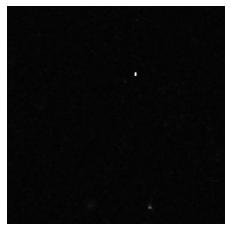

In [32]:
# FOR source 20
x = 3628.24
y = 1944.15

cut_size=(128, 128)
left_upper_x, left_upper_y = int(x-cut_size[0]/2), int(y-cut_size[0]/2)
data1 = np.zeros((data.shape[0]+cut_size[0], data.shape[1]+cut_size[1]))
data1[int(cut_size[0]/2):data.shape[0]+int(cut_size[0]/2), int(cut_size[1]/2):data.shape[1]+int(cut_size[1]/2)] = data
cutout = data1[left_upper_x:left_upper_x + cut_size[0], left_upper_y:left_upper_y + cut_size[1]]
# print(cutout.max(),cutout.min())
cutout = (cutout-cutout.min())/(cutout.max()-cutout.min())
plt.axis("off")
plt.imshow(cutout, cmap='Greys_r')
# plt.scatter(32, 32,color='r')
# plt.annotate('RA:'+str(y1)[:5]+' DEC:'+str(x1)[:5], xy=(32,40),color='r')

计算星系图像的非参数统计量

In [33]:
def ana(image):
    #   image = o_img[0,:,:]
    kernel = Gaussian2DKernel(2)
    kernel.normalize()  # make sure kernel adds up to 1
    psf = kernel.array  # we only need the numpy array
    snp = 100.0
    gain = 1e5
    sky_sigma = 1.0 / snp
    image += sky_sigma * np.random.standard_normal(size=(128, 128))
    threshold = detect_threshold(image, 1.5)
    npixels = 5  # minimum number of connected pixels
    convolved_image = convolve(image, psf)
    segmap = detect_sources(convolved_image, threshold, npixels)
    source_morphs = statmorph.source_morphology(
        image, segmap, gain=gain, psf=psf)
    morph = source_morphs[0]
    fig = make_figure(morph)

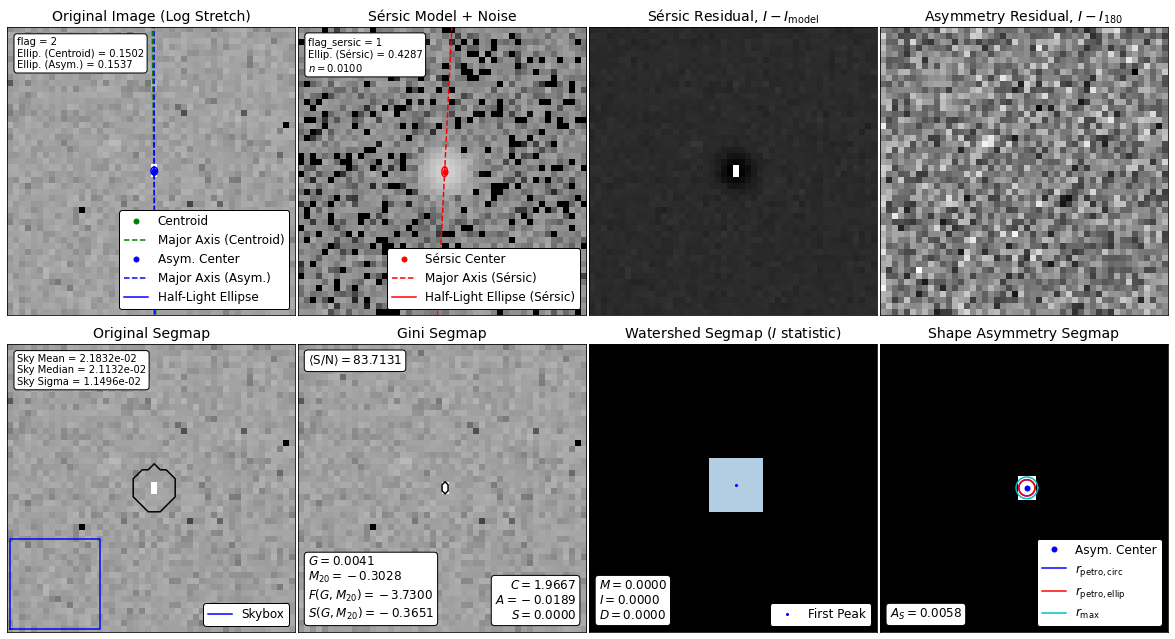

In [34]:
ana(cutout)

#### comments

detect_source不能单成一个万能工具来用，
点源的profile拟合没有意义。